In [1]:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Impotando o dataset
iris = srn.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Analise Exploratorio dos dados 

In [3]:
# Verificando se existe um NAN no conjunto de dados
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length

In [4]:
iris['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

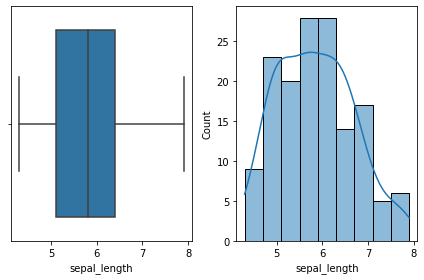

In [5]:
plt.figure(1)
plt.subplot(1, 2, 1)
srn.boxplot(x=iris['sepal_length'])
plt.subplot(1, 2, 2)
srn.histplot(x=iris['sepal_length'], kde=True)
plt.tight_layout()

sepal_width

In [6]:
# Resumo estatistico da coluna sepal_length
iris['sepal_width'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

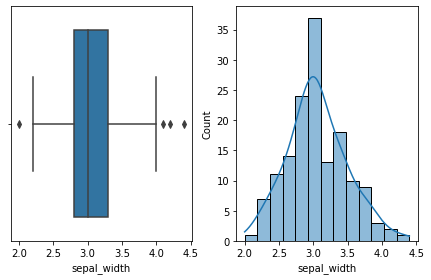

In [7]:
plt.figure(2)
plt.subplot(1, 2, 1)
srn.boxplot(x=iris['sepal_width'])
plt.subplot(1, 2, 2)
srn.histplot(x=iris['sepal_width'], kde=True)
plt.tight_layout()

petal_length

In [8]:
# Resumo estatistico da coluna petal_length
iris['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

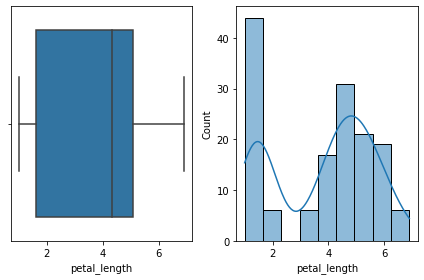

In [9]:
plt.figure(3)
plt.subplot(1, 2, 1)
srn.boxplot(x=iris['petal_length'])
plt.subplot(1, 2, 2)
srn.histplot(x=iris['petal_length'], kde=True)
plt.tight_layout()

# petal_width
# Resumo estatistico da coluna petal_width
iris['petal_width'].describe()

plt.figure(4)
plt.subplot(1, 2, 1)
srn.boxplot(x=iris['petal_width'])
plt.subplot(1, 2, 2)
srn.histplot(x=iris['petal_width'], kde=True)
plt.tight_layout()

In [10]:
# Resumo estatistico da coluna petal_width
iris['petal_width'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

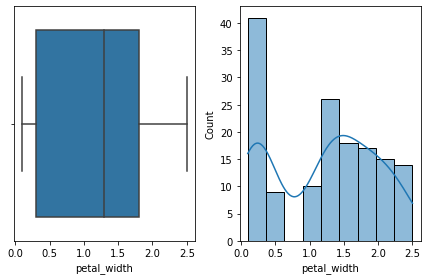

In [11]:
plt.figure(4)
plt.subplot(1, 2, 1)
srn.boxplot(x=iris['petal_width'])
plt.subplot(1, 2, 2)
srn.histplot(x=iris['petal_width'], kde=True)
plt.tight_layout()

species

In [22]:
# Observando a ocorrencia de cada valor individual da coluna species
# iris.groupby(iris['species']).size()
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Analisando os Dados utilizando machine learning com o algoritimo supervisionado
K-Nearest Neighbors. Desejamos observar a similariedade de uma amostra em um 
conjunto de dados, atravez da distancia entre eles.

In [23]:
# Matriz de recurso
X = iris.drop(columns='species')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Matriz de destino
Y = iris['species']
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [25]:
# Dividindo os dados em treinamento e testes
kfold = KFold(n_splits=10, shuffle=True)

In [26]:
neigh = KNeighborsClassifier(n_neighbors=3)

# Obtendo a pontuacao do modelo atravez da validacao cruzada
score = cross_val_score(neigh, X, Y, cv=kfold)

In [27]:
print(f'Vetor de predicoes (R^2): scores {score * 100}')

Vetor de predicoes (R^2): scores [ 96.66666667  90.          96.66666667  93.33333333 100.        ]
